# Measure of Divergence $\frac{x^2}{m}$

Author: [https://www.github.com/deburky](https://www.github.com/deburky)

### Binomial Example for Divergence Measure

Binomial distribution example from R. A. Fisher (1925, 14th edition, pp. 64–65). The values of the measure of divergence  
$\frac{x^2}{m}$, where $m$ is the expected value and $x$ is the absolute difference between the expected and observed values.  
The aggregate of these values is $x^2$, which measures the deviation of the whole series from the expected frequencies.  
The probability of $x^2$ exceeding 35.49 (under the hypothesis of fair dice) is 0.0001.

<div style="display: flex; align-items: flex-start; gap: 60px;">

  <!-- Table -->
  <div>
    <table border="1" cellspacing="0" cellpadding="4" style="width: 700px;">
      <thead>
        <tr>
          <th>Dice with 5 or 6</th>
          <th>Observed Freq.</th>
          <th>Expected (True)</th>
          <th>Expected (Biased)</th>
          <th>Divergence (True)</th>
          <th>Divergence (Biased)</th>
        </tr>
      </thead>
      <tbody>
        <tr><td>0</td><td>185</td><td>202.75</td><td>187.38</td><td>1.554</td><td>0.030</td></tr>
        <tr><td>1</td><td>1149</td><td>1216.50</td><td>1146.51</td><td>3.745</td><td>0.005</td></tr>
        <tr><td>2</td><td>3265</td><td>3345.37</td><td>3215.24</td><td>1.931</td><td>0.770</td></tr>
        <tr><td>3</td><td>5475</td><td>5575.61</td><td>5464.70</td><td>1.815</td><td>0.019</td></tr>
        <tr><td>4</td><td>6114</td><td>6272.56</td><td>6269.35</td><td>4.008</td><td>3.849</td></tr>
        <tr><td>5</td><td>5194</td><td>5018.05</td><td>5114.65</td><td>6.169</td><td>1.231</td></tr>
        <tr><td>6</td><td>3067</td><td>2927.20</td><td>3042.54</td><td>6.677</td><td>0.197</td></tr>
        <tr><td>7</td><td>1331</td><td>1254.51</td><td>1329.73</td><td>4.664</td><td>0.001</td></tr>
        <tr><td>8</td><td>403</td><td>392.04</td><td>423.76</td><td>0.306</td><td>1.017</td></tr>
        <tr><td>9</td><td>105</td><td>87.12</td><td>96.03</td><td>3.670</td><td>0.838</td></tr>
        <tr><td>10</td><td>14</td><td>13.07</td><td>14.69</td><td></td><td></td></tr>
        <tr><td>11</td><td>4</td><td>1.19</td><td>1.36</td><td>0.952</td><td>0.222</td></tr>
        <tr><td>12</td><td></td><td>0.05</td><td>0.06</td><td></td><td></td></tr>
        <tr>
          <td><strong>Total</strong></td>
          <td><strong>26306.00</strong></td>
          <td><strong>26306.02</strong></td>
          <td><strong>26306.00</strong></td>
          <td><strong>35.491</strong></td>
          <td><strong>8.179</strong></td>
        </tr>
        <tr>
          <td></td><td></td><td></td><td></td>
          <td><em>n = 10</em></td>
          <td><em>n = 9</em></td>
        </tr>
      </tbody>
    </table>
  </div>

  <!-- Image -->
  <div style="text-align: center;">
    <img src="https://img3.doubanio.com/view/subject/m/public/s4443777.jpg" 
         alt="Statistical Methods for Research Workers" 
         style="max-width: 700px; display: block; margin-bottom: 12px;">
  </div>

</div>

---

- K. Pearson (1900), *On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling*, *Philosophical Magazine*, 50 (5th series), 157–175.  
- M. Friendly (2000), *Visualizing Categorical Data*, SAS Institute, Cary, NC.

## Binomial Example with GLMs

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 1: Generate synthetic dataset
np.random.seed(42)

# Discrete X values (e.g., 1 to 10), 30 observations per level
X_discrete = np.repeat(np.arange(1, 11), 30)
n = len(X_discrete)

# True probability model: logistic with a weak slope
logit_p = -1 + 0.3 * X_discrete
p = 1 / (1 + np.exp(-logit_p))
y = np.random.binomial(1, p)

# Create DataFrame
df = pd.DataFrame({"X": X_discrete, "y": y})
df["X_squared"] = df["X"] ** 2  # For the mis-specified model

# Step 2: Fit three binomial regression models

# Model 1: No intercept
X1 = df["X"]
model1 = sm.GLM(df["y"], X1, family=sm.families.Binomial()).fit()
df["pred1"] = model1.predict(X1)

# Model 2: Linear in X
X2 = sm.add_constant(df["X"])
model2 = sm.GLM(df["y"], X2, family=sm.families.Binomial()).fit()
df["pred2"] = model2.predict(X2)

# Model 3: Mis-specified using X^2
X3 = sm.add_constant(df["X_squared"])
model3 = sm.GLM(df["y"], X3, family=sm.families.Binomial()).fit()
df["pred3"] = model3.predict(X3)

# Step 3: Summarize predicted and observed successes by group
summary = (
    df.groupby("X")
    .agg(
        Observed_Successes=("y", "sum"),
        Pred_Successes_Model1=("pred1", "sum"),
        Pred_Successes_Model2=("pred2", "sum"),
        Pred_Successes_Model3=("pred3", "sum"),
    )
    .reset_index()
)

# Step 4: Compute chi-square components for each model
summary["Chi2_Component_Model1"] = (
    summary["Observed_Successes"] - summary["Pred_Successes_Model1"]
) ** 2 / summary["Pred_Successes_Model1"]
summary["Chi2_Component_Model2"] = (
    summary["Observed_Successes"] - summary["Pred_Successes_Model2"]
) ** 2 / summary["Pred_Successes_Model2"]
summary["Chi2_Component_Model3"] = (
    summary["Observed_Successes"] - summary["Pred_Successes_Model3"]
) ** 2 / summary["Pred_Successes_Model3"]

# Step 5: Total chi-square deviation sums
chi2_model1 = summary["Chi2_Component_Model1"].sum()
chi2_model2 = summary["Chi2_Component_Model2"].sum()
chi2_model3 = summary["Chi2_Component_Model3"].sum()

# Step 6: Compile comparison table
chi2_comparison = pd.DataFrame(
    {
        "Model": ["X without Intercept", "With X", "With X^2 (Wrong Form)"],
        "Chi2 Deviation Sum": [chi2_model1, chi2_model2, chi2_model3],
    }
)

# Print or return results
display(summary)
display(chi2_comparison)

,X,Observed_Successes,Pred_Successes_Model1,Pred_Successes_Model2,Pred_Successes_Model3,Chi2_Component_Model1,Chi2_Component_Model2,Chi2_Component_Model3
0,1,7,16.088643,9.755940,12.613139,5.134270,0.778521,2.497977
1,2,12,17.165878,11.864572,13.187655,1.554613,0.001546,0.106958
2,3,14,18.220770,14.111273,14.156443,0.977725,0.000877,0.001729
3,4,17,19.243288,16.398715,15.522851,0.261512,0.022047,0.140565
4,5,22,20.224665,18.622362,17.263864,0.155840,0.612620,1.299302
5,6,23,21.157648,20.688886,19.305762,0.160427,0.258170,0.706908
6,7,21,22.036647,22.530615,21.508121,0.048766,0.103982,0.012004
7,8,27,22.857763,24.111734,23.675640,0.750648,0.345976,0.466782
8,9,19,23.618730,25.426106,25.606991,0.903210,1.624112,1.704704
9,10,28,24.318771,26.489798,27.159534,0.557242,0.086098,0.026009


,Model,Chi2 Deviation Sum
0,X without Intercept,10.504252
1,With X,3.833950
2,With X^2 (Wrong Form),6.962938


## Categorical association (Cramer's V measure)

We can convert Chi-square into a measure of association using Cramer's V. This is a measure of association between two nominal variables, giving a value between 0 and 1. A value of 0 indicates no association, while a value of 1 indicates perfect association.

---

### Airbnb Dataset
Dataset includes information such as realSum (the total price of the listing), room_type (private/shared/entire home/apt), host_is_superhost (boolean value indicating if host is a superhost or not), multi (indicator whether listing is for multiple rooms or not), biz (business indicator) , guest_satisfaction_overall (overall rating from guests camparing all listings offered by host ), bedrooms, dist (distance from city center) , lng & lat coordinates for location identification etc.

[Kaggle Airbnb dataset](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities)  
[Determinants of Airbnb prices in European cities: A spatial econometrics approach](https://zenodo.org/records/4446043#.Y9Y9ENJBwUE)

In [5]:
import pandas as pd

df = pd.read_csv("airbnb.csv")
df.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


### **11.2.4 Evaluating categorical metrics**

Delving into the world of categorical tests, we need to start thinking in the realm of happen versus not happen in regard to events that we're measuring (Wilson B., Machine Learning Engineering in Action, 2022).

In [7]:
import numpy as np
import pandas as pd
from collections import namedtuple
from scipy.stats import fisher_exact, chi2_contingency


# Significance test for categorical data (adaptation from Wilson 2022)
def categorical_significance(group1_happen, group1_not, group2_happen, group2_not):
    """Compute Fisher's exact test and Chi-squared test for categorical data."""
    CategoricalTest = namedtuple(
        "CategoricalTest",
        [
            "fisher_stat",
            "fisher_p",
            "chisq_stat",
            "chisq_p",
            "chisq_df",
            "chisq_expected",
        ],
    )
    matrix = np.array([[group1_happen, group2_happen], [group1_not, group2_not]])
    print(f"\nContingency Matrix (satisfied / city):\n{matrix}")

    try:
        fisher_stat, fisher_p = fisher_exact(matrix)
    except Exception as e:
        fisher_stat = fisher_p = None
        print(f"Fisher's test failed: {e}")

    try:
        chisq_stat, chisq_p, chisq_df, chisq_expected = chi2_contingency(matrix)
    except ValueError as e:
        chisq_stat = chisq_p = chisq_df = chisq_expected = None
        print(f"Chi-squared test skipped due to error: {e}")

    return CategoricalTest(
        fisher_stat, fisher_p, chisq_stat, chisq_p, chisq_df, chisq_expected
    )


# Filter and copy the DataFrame
df_filtered = df[
    df["guest_satisfaction_overall"].notna() & df["city"].isin(["paris", "berlin"])
].copy()

# Satisfaction threshold
satisfaction_cutoff = 95
df_filtered["is_satisfied"] = (
    df_filtered["guest_satisfaction_overall"] >= satisfaction_cutoff
).astype(int)

# Split the data by city
paris = df_filtered[df_filtered["city"] == "paris"]["is_satisfied"].values
berlin = df_filtered[df_filtered["city"] == "berlin"]["is_satisfied"].values

# Step 4: Count satisfied / not
paris_happen = paris.sum()
paris_not = len(paris) - paris_happen
berlin_happen = berlin.sum()
berlin_not = len(berlin) - berlin_happen

print(f"Paris: {paris_happen} satisfied, {paris_not} not satisfied")
print(f"Berlin: {berlin_happen} satisfied, {berlin_not} not satisfied")

# Step 5: Run the test
satisfaction_test = categorical_significance(
    paris_happen, paris_not, berlin_happen, berlin_not
)

# Step 6: Output
print("\nGuest Satisfaction (score ≥ 95) by City")
if satisfaction_test.fisher_stat is not None:
    print(
        f"Fisher's Exact Test: stat={satisfaction_test.fisher_stat:.4f}, p-value={satisfaction_test.fisher_p:.4f}"
    )
else:
    print("Fisher's Exact Test: Not applicable.")

if satisfaction_test.chisq_stat is not None:
    print(
        f"Chi-Squared Test: stat={satisfaction_test.chisq_stat:.4f}, p-value={satisfaction_test.chisq_p:.4f}"
    )
else:
    print("Chi-Squared Test: Not applicable.")

paris_rate = paris_happen / (paris_happen + paris_not)
berlin_rate = berlin_happen / (berlin_happen + berlin_not)

print(f"\nParis satisfaction rate: {paris_rate:.2%}")
print(f"Berlin satisfaction rate: {berlin_rate:.2%}")

Paris: 3108 satisfied, 3580 not satisfied
Berlin: 1515 satisfied, 969 not satisfied

Contingency Matrix (satisfied / city):
[[3108 1515]
 [3580  969]]

Guest Satisfaction (score ≥ 95) by City
Fisher's Exact Test: stat=0.5553, p-value=0.0000
Chi-Squared Test: stat=152.1582, p-value=0.0000

Paris satisfaction rate: 46.47%
Berlin satisfaction rate: 60.99%


### Correlation map

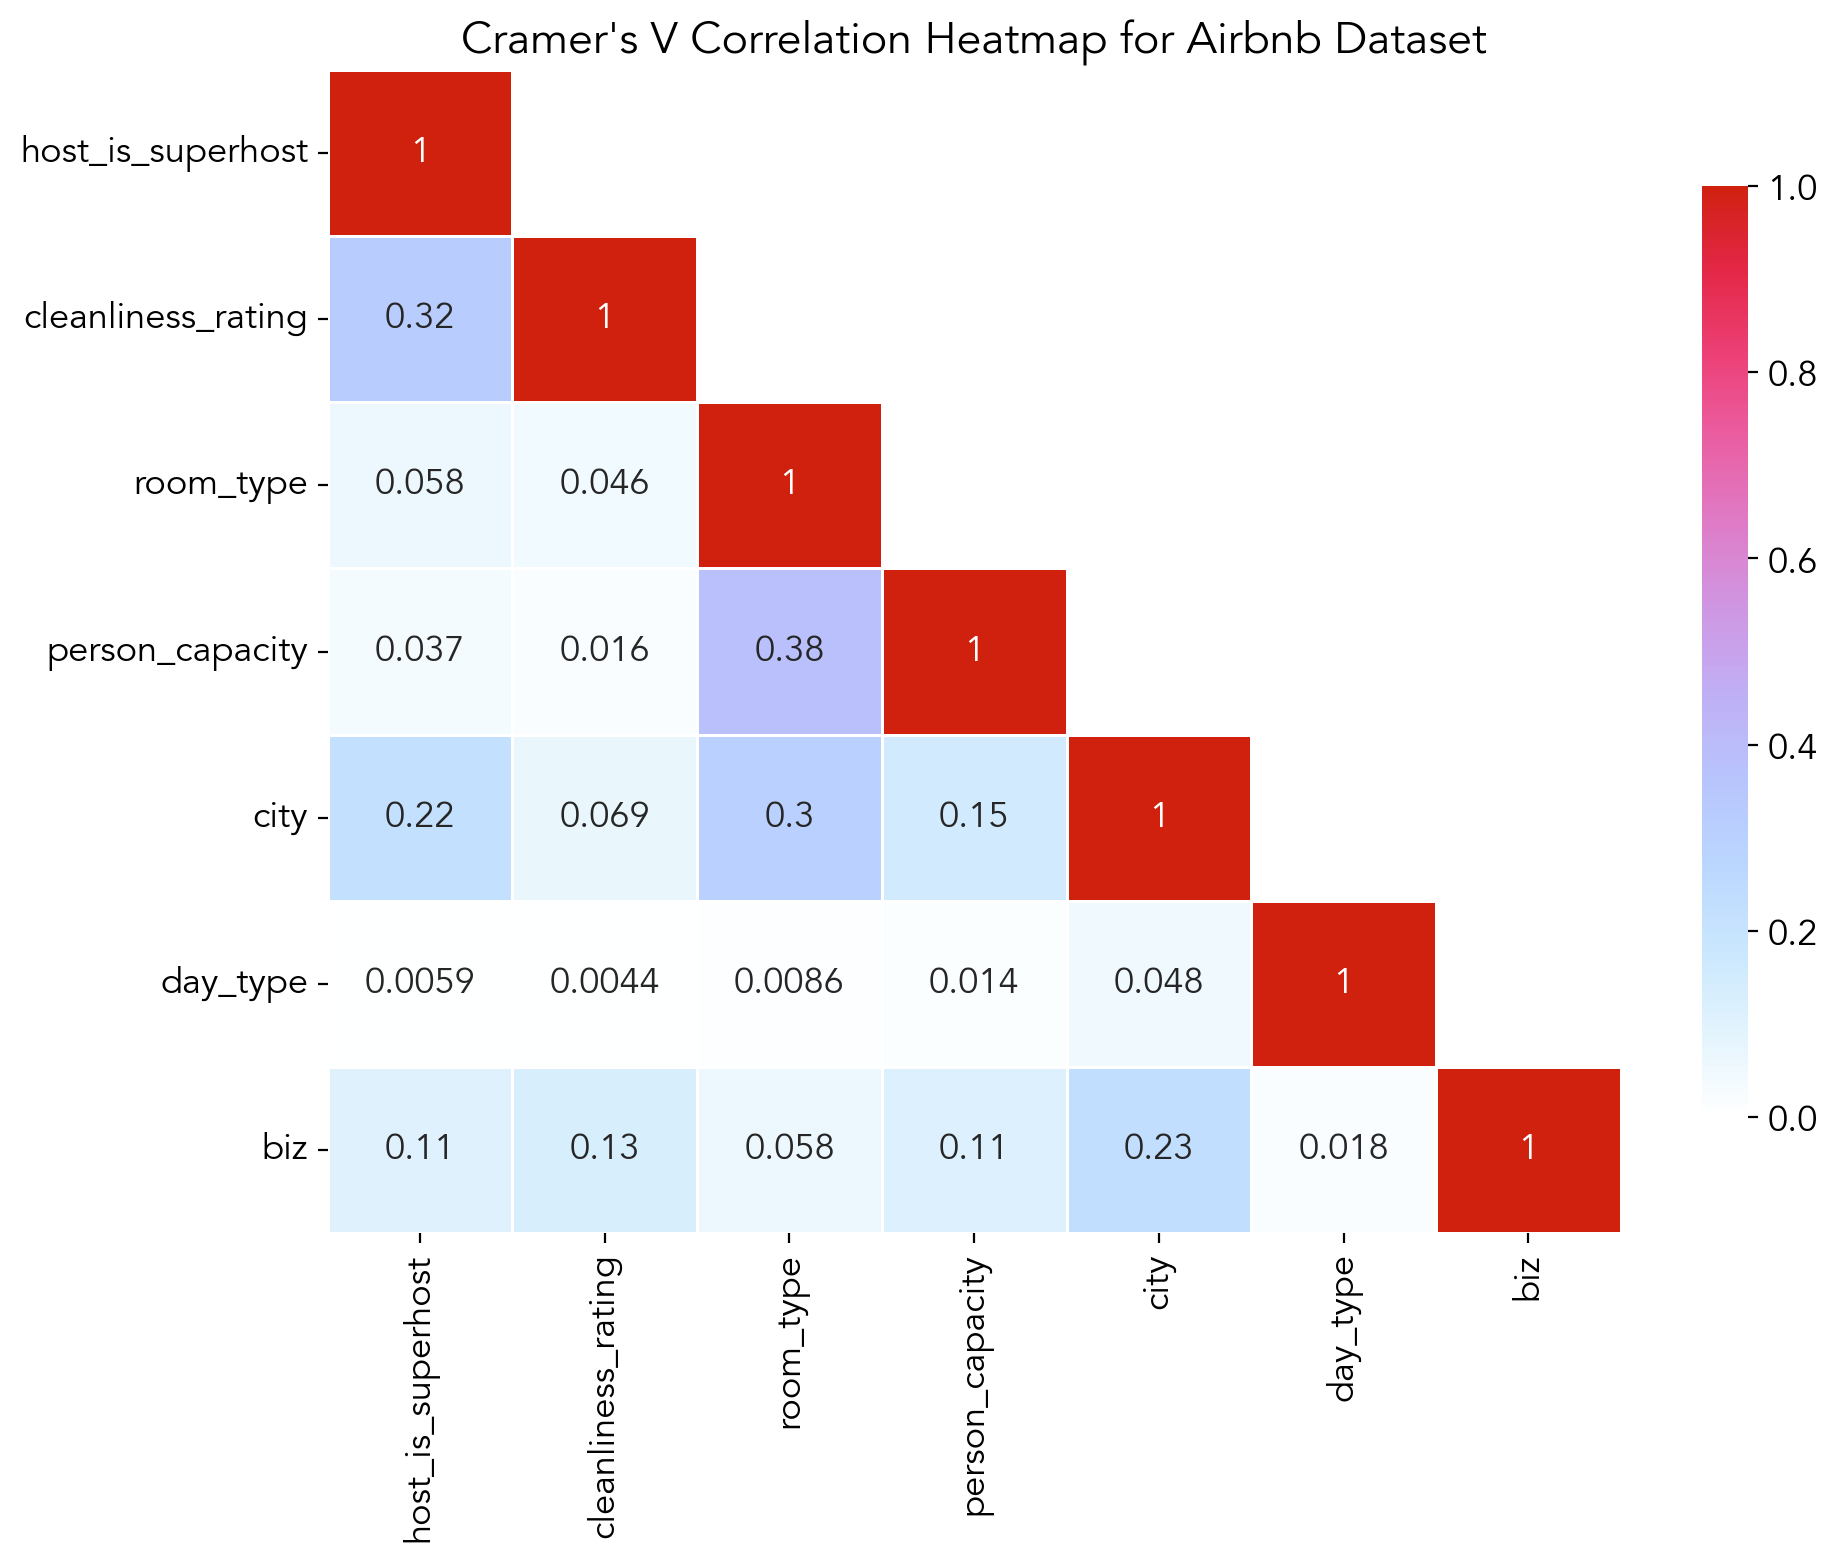

In [8]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cmap import Colormap
from scipy.stats.contingency import association

%config InlineBackend.figure_format = "retina"

cmap1 = "colorcet:cet_l19"
cmap2 = "chrisluts:ygc_3c"
cm1 = Colormap(cmap1).to_mpl()
cm2 = Colormap(cmap2).to_mpl()

# Set font to Arial
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 13

# Define nominal features
nominal_features = [
    "host_is_superhost",
    "cleanliness_rating",
    "room_type",
    "person_capacity",
    "city",
    "day_type",
    "biz",
]

# Create a copy of the dataframe with only nominal features
df_nominal = df[nominal_features].copy()


# Create a function to calculate Cramer's V using scipy's association function
def calculate_cramers_v(x, y):
    """
    Calculate Cramer's V statistic for categorical-categorical association.
    Uses scipy.stats.contingency.association with method='cramer'
    """
    # Create contingency table
    confusion_matrix = pd.crosstab(x, y)

    # Calculate Cramer's V using scipy's association function
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Suppress warnings for small sample sizes
        result = association(confusion_matrix, method="cramer")

    return result


# Create a correlation matrix for nominal features using Cramer's V
def create_cramers_v_matrix(df, features):
    """
    Create a correlation matrix for nominal features using Cramer's V
    """
    n_features = len(features)
    cramers_matrix = np.zeros((n_features, n_features))

    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i == j:
                cramers_matrix[i, j] = 1.0  # Diagonal elements are 1
            else:
                # Calculate Cramer's V between feature1 and feature2
                cramers_v = calculate_cramers_v(df[feature1], df[feature2])
                cramers_matrix[i, j] = cramers_v

    return pd.DataFrame(cramers_matrix, index=features, columns=features)


# Calculate Cramer's V correlation matrix
cramers_v_matrix = create_cramers_v_matrix(df_nominal, nominal_features)
# show only triangle
mask = np.triu(np.ones_like(cramers_v_matrix, dtype=bool), k=1)
cramers_v_matrix = cramers_v_matrix.where(~mask)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cramers_v_matrix,
    annot=True,
    cmap=cm1,
    vmin=0,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Cramer's V Correlation Heatmap for Airbnb Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# Summary view
pd.crosstab(
    df["city"],
    df["room_type"],
    normalize="all",
).style.background_gradient(cmap=cm1).format("{:.2%}").set_caption(
    "Cross-tabulation of categorical data"
).set_table_attributes('style="width: 20%;"').set_table_styles(
    [{"selector": "caption", "props": "caption-side: bottom; font-size:1.25em;"}],
    overwrite=False,
)

room_type,Entire home/apt,Private room,Shared room
city,,,
amsterdam,2.18%,1.83%,0.02%
athens,9.42%,0.77%,0.02%
barcelona,1.05%,4.41%,0.02%
berlin,1.71%,2.96%,0.14%
budapest,6.94%,0.81%,0.03%
lisbon,7.50%,3.50%,0.14%
london,8.48%,10.75%,0.10%
paris,9.80%,2.95%,0.18%
rome,10.75%,6.68%,0.02%


## Multinomial Example

[Chapter 12 Multinomial Regression](https://brian-ling.github.io/multinomial-regression-model.html)

In [ ]:
import catboost as cb
import numpy as np
import pandas as pd
from category_encoders import WOEEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from tabulate import tabulate

# Load the dataset
path = "airbnb.csv"
df = pd.read_csv(path)

df["rating_group"] = np.select(
    [
        df["guest_satisfaction_overall"] < 90,
        (df["guest_satisfaction_overall"] >= 90)
        & (df["guest_satisfaction_overall"] < 95),
        df["guest_satisfaction_overall"] >= 95,
    ],
    ["low", "medium", "high"],
)

# Define features
nominal_features = [
    "bedrooms",
    "host_is_superhost",
    "room_type",
    "person_capacity",
    "city",
    "day_type",
    "biz",
]
numerical_features = [
    "dist",
    "metro_dist",
    "attr_index",
    "attr_index_norm",
    "rest_index",
    "realSum",
]
features = nominal_features + numerical_features

# Choose group column for analysis
group_col = "city"  # Group by city
assert group_col in nominal_features, f"{group_col} must be one of: {nominal_features}"

# Ensure proper dtypes
df[nominal_features] = df[nominal_features].astype("string")
df["rating_group"] = df["rating_group"].astype(str)
df[group_col] = df[group_col].astype("string")

X_train, X_test, y_train, y_test = train_test_split(
    df[features], df["rating_group"], test_size=0.2, random_state=42
)


# Helper function to summarize predictions by group
def summarize_by_group(df, group_col, classes):
    summary = []
    for group_value, group_df in df.groupby(group_col):
        row = {group_col: group_value}
        chi2_total = 0
        for cls in classes:
            obs = (group_df["rating_group"] == cls).sum()
            exp = group_df[f"prob_{cls}"].sum().round(4)
            chi2 = (obs - exp) ** 2 / (exp + 1e-6)
            row[f"obs_{cls}"] = obs
            row[f"exp_{cls}"] = exp
            row[f"chi2_{cls}"] = chi2
            chi2_total += chi2
        row["chi2_total"] = chi2_total
        summary.append(row)
    return pd.DataFrame(summary)


def process_model(
    model, X_test, y_test, group_col, model_name="Model", X_test_raw=None
):
    probs = model.predict_proba(X_test)
    classes = model.classes_
    df_preds = pd.DataFrame(index=range(len(X_test)))
    df_preds[group_col] = X_test_raw[group_col].values
    df_preds["rating_group"] = y_test.values
    for i, cls in enumerate(classes):
        df_preds[f"prob_{cls}"] = probs[:, i]
    summary = summarize_by_group(df_preds, group_col, classes)
    return summary, classes


def print_class_summary(summary_df, group_col, classes, label):
    print(f"\n### Model: {label}")
    for cls in classes:
        subset = summary_df[
            [group_col, f"obs_{cls}", f"exp_{cls}", f"chi2_{cls}"]
        ].copy()
        subset.columns = [group_col.capitalize(), "Observed", "Expected", "Chi2"]
        print(f"\nClass: {cls}")
        print(tabulate(subset, headers="keys", tablefmt="github", floatfmt=".2f"))


# 1. CatBoost Model
cb_model = cb.CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    cat_features=nominal_features,
    verbose=0,
)
cb_model.fit(X_train, y_train)
cb_summary, cb_classes = process_model(
    cb_model, X_test, y_test, group_col, "CatBoost", X_test
)

# 2. OHE + Logistic using ColumnTransformer
ohe_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_features),
        ("num", "passthrough", numerical_features),
    ]
)

ohe_pipeline = make_pipeline(
    ohe_preprocessor, LogisticRegression(max_iter=1000, random_state=42)
)
ohe_pipeline.fit(X_train, y_train)
ohe_summary, ohe_classes = process_model(
    ohe_pipeline, X_test, y_test, group_col, "OHE + Logistic", X_test
)

# 3. WOEEncoder + Logistic OvR
class_labels = ["low", "medium", "high"]
woe_probs_ovr = []

for cls in class_labels:
    y_train_bin = (y_train == cls).astype(int)

    woe_encoder = WOEEncoder(cols=nominal_features)
    X_train_woe = woe_encoder.fit_transform(X_train[nominal_features], y_train_bin)
    X_test_woe = woe_encoder.transform(X_test[nominal_features])

    X_train_full = pd.concat(
        [
            X_train_woe.reset_index(drop=True),
            X_train[numerical_features].reset_index(drop=True),
        ],
        axis=1,
    )
    X_test_full = pd.concat(
        [
            X_test_woe.reset_index(drop=True),
            X_test[numerical_features].reset_index(drop=True),
        ],
        axis=1,
    )

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_full, y_train_bin)

    woe_probs_ovr.append(model.predict_proba(X_test_full)[:, 1])

# Normalize class probability predictions
woe_probs = np.vstack(woe_probs_ovr).T
woe_probs /= woe_probs.sum(axis=1, keepdims=True)

X_test_woe_preds = X_test.copy()
X_test_woe_preds["rating_group"] = y_test.values
X_test_woe_preds[group_col] = X_test[group_col]

for i, cls in enumerate(class_labels):
    X_test_woe_preds[f"prob_{cls}"] = woe_probs[:, i]

woe_summary = summarize_by_group(X_test_woe_preds, group_col, class_labels)

# Print class-level breakdowns
print_class_summary(cb_summary, group_col, cb_classes, "CatBoost")
print_class_summary(ohe_summary, group_col, ohe_classes, "OHE + Logistic")
print_class_summary(woe_summary, group_col, class_labels, "WOE + Logistic")

# Total Chi2 comparison
chi2_comparison = pd.DataFrame(
    {
        "Model": ["CatBoost", "OHE + Logistic", "WOE + Logistic"],
        "Chi2 Deviation Sum": [
            cb_summary["chi2_total"].sum(),
            ohe_summary["chi2_total"].sum(),
            woe_summary["chi2_total"].sum(),
        ],
    }
)
print("\n### Total Chi2 Divergence Comparison")
print(tabulate(chi2_comparison, headers="keys", tablefmt="github", floatfmt=".2f"))


/Users/deburky/Documents/python/python-ml-projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deburky/Documents/python/python-ml-projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h


### Model: CatBoost

Class: high
|    | City      |   Observed |   Expected |   Chi2 |
|----|-----------|------------|------------|--------|
|  0 | amsterdam |        259 |     287.35 |   2.80 |
|  1 | athens    |        744 |     727.86 |   0.36 |
|  2 | barcelona |        213 |     217.74 |   0.10 |
|  3 | berlin    |        325 |     314.99 |   0.32 |
|  4 | budapest  |        502 |     508.56 |   0.08 |
|  5 | lisbon    |        470 |     474.73 |   0.05 |
|  6 | london    |        940 |     947.94 |   0.07 |
|  7 | paris     |        630 |     599.60 |   1.54 |
|  8 | rome      |        974 |     941.56 |   1.12 |
|  9 | vienna    |        440 |     426.35 |   0.44 |

Class: low
|    | City      |   Observed |   Expected |   Chi2 |
|----|-----------|------------|------------|--------|
|  0 | amsterdam |         69 |      56.06 |   2.99 |
|  1 | athens    |        125 |     127.46 |   0.05 |
|  2 | barcelona |        188 |     174.11 |   1.11 |
|  3 | berlin    |         79 |     

/Users/deburky/Documents/python/python-ml-projects/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
